In [2]:
from spacy import displacy
import spacy
from matplotlib import pyplot as plt
import cv2
from sklearn.preprocessing import MinMaxScaler
import time
import random
import plotly.express as px
from sklearn.impute import KNNImputer
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from scipy.stats import pearsonr
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({'Country': ['Afghanistan', 'Cameroon', 'Indonesia', 'Guatemala'], 'UrbanPopulation': [10142913, 15248270, 153983073,
                  8738685], 'RuralPopulation': [28829316, 11242817, 117874900, 8119648], 'SlumPopulation': [7434756, 4981883, 29889391, 3285745]})
df.head()

,Country,UrbanPopulation,RuralPopulation,SlumPopulation
0,Afghanistan,10142913,28829316,7434756
1,Cameroon,15248270,11242817,4981883
2,Indonesia,153983073,117874900,29889391
3,Guatemala,8738685,8119648,3285745


In [3]:
df['SlumPopulation'] = round(
    (df['SlumPopulation']/(df['UrbanPopulation']))*100, 2)
df.head()

,Country,UrbanPopulation,RuralPopulation,SlumPopulation
0,Afghanistan,10142913,28829316,73.30
1,Cameroon,15248270,11242817,32.67
2,Indonesia,153983073,117874900,19.41
3,Guatemala,8738685,8119648,37.60


In [4]:
df['UrbanPopulation'] = round(
    (df['UrbanPopulation']/(df['UrbanPopulation']+df['RuralPopulation']))*100, 2)
df.head()

,Country,UrbanPopulation,RuralPopulation,SlumPopulation
0,Afghanistan,26.03,28829316,73.30
1,Cameroon,57.56,11242817,32.67
2,Indonesia,56.64,117874900,19.41
3,Guatemala,51.84,8119648,37.60


In [5]:
df = df.drop(columns=['RuralPopulation'])
df.head()

,Country,UrbanPopulation,SlumPopulation
0,Afghanistan,26.03,73.30
1,Cameroon,57.56,32.67
2,Indonesia,56.64,19.41
3,Guatemala,51.84,37.60


In [6]:
# buat dataset dengan format dataframe
df = pd.DataFrame({'age': [25, 26, 29, 30, 30, 31, 44, 46],
                   'IQ': [np.nan, 121, 91, np.nan, 110, np.nan, 118, 93]})
display(df)

,age,IQ
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0


In [7]:
mean = df['IQ'].mean()
print(f'Mean: {mean}, dibulatkan menjadi {round(mean)}')
display(df)

Mean: 106.6, dibulatkan menjadi 107


,age,IQ
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0


In [8]:
# masukkan nilai mean ke missing value
df['IQ'] = df['IQ'].fillna(round(mean))
display(df)

,age,IQ
0,25,107.0
1,26,121.0
2,29,91.0
3,30,107.0
4,30,110.0
5,31,107.0
6,44,118.0
7,46,93.0


In [9]:
# buat dataset dengan format dataframe
df = pd.DataFrame({'age': [25, 26, 29, 30, 30, 31, 44, 46],
                   'IQ': [np.nan, 121, 91, np.nan, 110, np.nan, 118, 93]})
display(df)

,age,IQ
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0


In [10]:
df['IQ'] = df['IQ'].fillna(130)
display(df)

,age,IQ
0,25,130.0
1,26,121.0
2,29,91.0
3,30,130.0
4,30,110.0
5,31,130.0
6,44,118.0
7,46,93.0


In [11]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [85, 90, 95, 95, 100, np.nan, 100, 110, 105, 105, 110,
        np.nan, 110, 110, 115, 115, 115, 120, np.nan, 125, 130]

# make a dataframe
df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

,age,IQ
0,25,85.0
1,26,90.0
2,29,95.0
3,30,95.0
4,30,100.0
5,31,NaN
6,44,100.0
7,46,110.0
8,22,105.0
9,33,105.0


# END OF TAIL

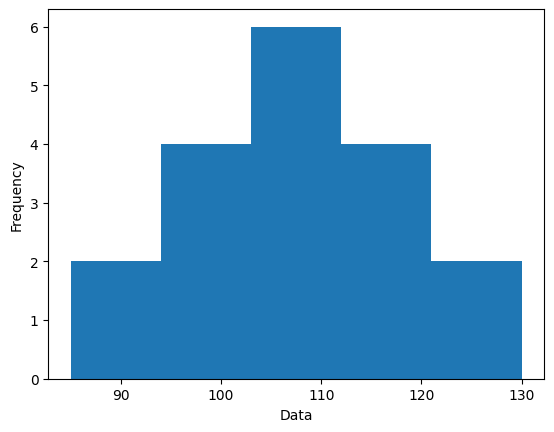

In [13]:
data = [85, 90, 95, 95, 100, np.nan, 100, 110, 105, 105, 110,
        np.nan, 110, 110, 115, 115, 115, 120, np.nan, 125, 130]

plt.hist(data, bins=5)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.show()

In [14]:
# nilai kosong dihilangkan dari data terlebih dahulu
data = [85, 90, 95, 95, 100, 100, 110, 105, 105,
        110, 110, 110, 115, 115, 115, 120, 125, 130]
mean = np.mean(data)
print(f'Mean dari dataset adalah: ', mean)

Mean dari dataset adalah:  107.5


In [15]:
total = 0
for i in data:
    calc = (107.5-i)**2
    total = total + calc

print(f'jarak antara nilai x dan mean adalah ', total)

jarak antara nilai x dan mean adalah  2412.5


In [16]:
# math.sqrt adalah fungsi untuk melakukan operasi akar pangkat
# round adalah fungsi untuk membulatkan hasil operasi)
stddev = round(math.sqrt(total/len(data)), 2)
print(f'nilai standar deviasi adalah ', stddev)

nilai standar deviasi adalah  11.58


In [17]:
imp = round(mean + 3 * stddev, 1)
print(f'nilai imputasi end of tail adalah ', imp)

nilai imputasi end of tail adalah  142.2


In [18]:
df['IQ'] = df['IQ'].fillna(imp)
display(df)

,age,IQ
0,25,85.0
1,26,90.0
2,29,95.0
3,30,95.0
4,30,100.0
5,31,142.2
6,44,100.0
7,46,110.0
8,22,105.0
9,33,105.0


## DISTRIBUSI SKEWED

In [19]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [125, 130, 125, 95, 115, np.nan, 100, np.nan, 130, 110,
        90, 110, 120, 115, 105, 85, 115, 110, 120, 100, np.nan]

df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

,age,IQ
0,25,125.0
1,26,130.0
2,29,125.0
3,30,95.0
4,30,115.0
5,31,NaN
6,44,100.0
7,46,NaN
8,22,130.0
9,33,110.0


In [20]:
data = [125, 130, 125, 95, 115, 100, 130, 110, 90,
        110, 120, 115, 105, 85, 115, 110, 120, 100]

fig = px.histogram(df, x='IQ')
fig.show()

In [21]:
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

print(f'Median: {median}')
print(f'Q1: {q1}')
print(f'Q3: {q3}')

Median: 112.5
Q1: 101.25
Q3: 120.0


In [22]:
iqr = q3 - q1
iqrmin = q1 + 3 * iqr
iqrmax = q3 + 3 * iqr

print(f'IQR: {iqr}')
print(f'IQRmin: {iqrmin}')
print(f'IQRmax: {iqrmax}')

IQR: 18.75
IQRmin: 157.5
IQRmax: 176.25


In [23]:
df['IQ'] = df['IQ'].fillna(iqrmax)
display(df)

,age,IQ
0,25,125.00
1,26,130.00
2,29,125.00
3,30,95.00
4,30,115.00
5,31,176.25
6,44,100.00
7,46,176.25
8,22,130.00
9,33,110.00


# REGRESI LINIER

In [24]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [125, 130, 125, 95, 115, np.nan, 100, np.nan, 130, 110,
        90, 110, 120, 115, 105, 85, 115, 110, 120, 100, np.nan]

df = pd.DataFrame({'age': age, 'IQ': data})

# hapus data NaN
df = df.dropna()

# buat grafik scatter
fig = px.scatter(df, x='age', y='IQ',
                 color='age', hover_data=['age', 'IQ'])
fig.show()

In [25]:
corr, _ = pearsonr(df['age'], df['IQ'])
print(f'Pearsons correlation: {round(corr,2)}')

Pearsons correlation: -0.53


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


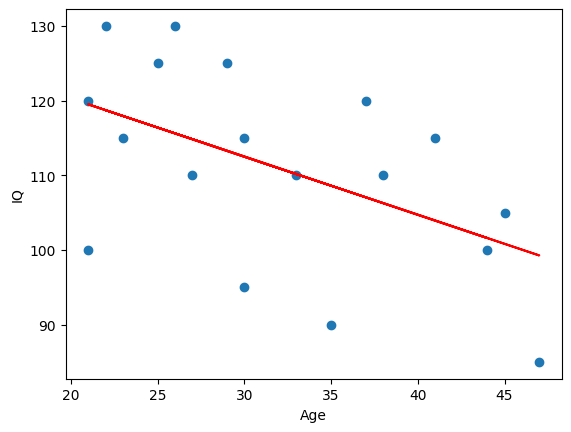

In [29]:
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(1))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

model.fit(df['age'], df['IQ'], epochs=1000, verbose=0)

pred = model.predict(df['age'])

plt.scatter(df['age'], df['IQ'])
plt.plot(df['age'], pred, color='red')
plt.xlabel('Age')
plt.ylabel('IQ')
plt.show()

In [35]:
hasilprediksi = model.predict(np.array([27, 31, 37]).reshape(-1, 1)).round(0).astype(int)
print(hasilprediksi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[115]
 [112]
 [107]]


In [36]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
data = [125, 130, 125, 95, 115, np.nan, 100, np.nan, 130, 110,
        90, 110, 120, 115, 105, 85, 115, 110, 120, 100, np.nan]

data[5] = hasilprediksi[0][0]
data[7] = hasilprediksi[1][0]
data[20] = hasilprediksi[2][0]
df = pd.DataFrame({'age': age, 'IQ': data})
display(df)

,age,IQ
0,25,125
1,26,130
2,29,125
3,30,95
4,30,115
5,31,115
6,44,100
7,46,112
8,22,130
9,33,110


# FREQUENT

In [37]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
IQ = ['rendah', 'sedang', 'sedang', np.nan, 'sedang', 'rendah', np.nan, 'tinggi', 'sedang', 'sedang',
      'rendah', 'sedang', 'tinggi', 'sedang', np.nan, 'rendah', 'tinggi', 'sedang', 'tinggi', 'rendah', 'tinggi']

df = pd.DataFrame({'age': age, 'IQ': IQ})
display(df)

,age,IQ
0,25,rendah
1,26,sedang
2,29,sedang
3,30,NaN
4,30,sedang
5,31,rendah
6,44,NaN
7,46,tinggi
8,22,sedang
9,33,sedang


In [38]:
freq = df['IQ'].value_counts()
print(freq)

IQ
sedang    8
rendah    5
tinggi    5
Name: count, dtype: int64


In [39]:
df['IQ'] = df['IQ'].fillna('sedang')
display(df)

,age,IQ
0,25,rendah
1,26,sedang
2,29,sedang
3,30,sedang
4,30,sedang
5,31,rendah
6,44,sedang
7,46,tinggi
8,22,sedang
9,33,sedang


# KNN

In [40]:
age = [25, 26, 29, 30, 30, 31, 44, 46, 22, 33,
       35, 27, 21, 23, 45, 47, 41, 38, 37, 21, 24]
IQ = ['rendah', 'sedang', 'sedang', np.nan, 'sedang', 'rendah', np.nan, 'tinggi', 'sedang', 'sedang',
      'rendah', 'sedang', 'tinggi', 'sedang', np.nan, 'rendah', 'tinggi', 'sedang', 'tinggi', 'rendah', 'tinggi']

df = pd.DataFrame({'age': age, 'IQ': IQ})
display(df)

,age,IQ
0,25,rendah
1,26,sedang
2,29,sedang
3,30,NaN
4,30,sedang
5,31,rendah
6,44,NaN
7,46,tinggi
8,22,sedang
9,33,sedang


In [42]:
#KONVERSI STRING
df['IQ'] = df['IQ'].map({'rendah': 1, 'sedang': 2, 'tinggi': 3})
display(df)


,age,IQ
0,25,1.0
1,26,2.0
2,29,2.0
3,30,NaN
4,30,2.0
5,31,1.0
6,44,NaN
7,46,3.0
8,22,2.0
9,33,2.0


In [43]:
imputer = KNNImputer(n_neighbors=3)
# isi missing value dengan KNN, lalu dibulatkan
df = pd.DataFrame(np.round(imputer.fit_transform(df)), columns=df.columns)
display(df)

,age,IQ
0,25.0,1.0
1,26.0,2.0
2,29.0,2.0
3,30.0,2.0
4,30.0,2.0
5,31.0,1.0
6,44.0,2.0
7,46.0,3.0
8,22.0,2.0
9,33.0,2.0


# PENGOLAHAN CITRA

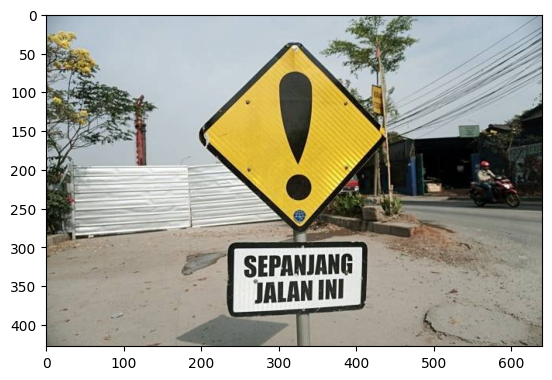

In [50]:
# buka gambar menggunakan opencv
img = cv2.imread("image2.jpg")

# OpenCV membuka gambar menggunakan metode BRG (blue red green)
# namun kita ingin membuka dengan metoded RGB (red green blue)
# kita harus konversi dari BRG ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# kita juga membutuhkan gambar versi grayscale (hitam putih)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# menampilkan gambar menggunakan matplotlib
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

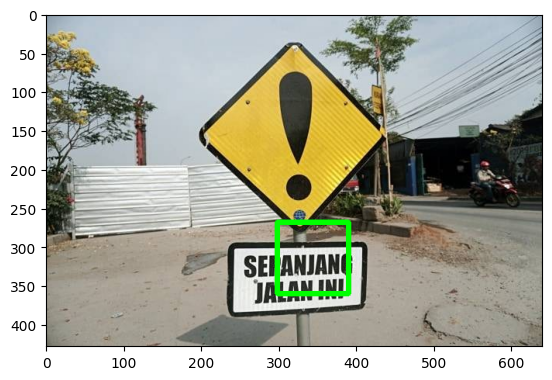

In [51]:
# load model yang sudah dilatih untuk mendeteksi stop sign
# model berbentuk file xml
stop_data = cv2.CascadeClassifier('stop_data.xml')

# buat ukuran kotak minimum agar ukuran kotak yang terdeteksi tidak terlalu kecil
found = stop_data.detectMultiScale(img_gray,
                                   minSize=(5, 5))

# hitung jumlah objek yang ditemukan.
amount_found = len(found)

# jika objek tidak ditemukan maka tidak dilakukan apa-apa
if amount_found != 0:

    # jika objek yang ditemukan lebih dari satu, maka :
    for (x, y, width, height) in found:

        # kita gambar sebuah kotak hijau di objek yang ditemukan
        cv2.rectangle(img_rgb, (x, y),
                      (x + height, y + width),
                      (0, 255, 0), 5)

# tampilkan hasil citra menggunakan plt
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()